# Part II - Ford GoBike Trip Duration per Datetime and User Type
## by Samuel Sarpong


## Investigation Overview


In this investigation, I wanted to take a look at how the duration of trips changes with respect to DateTime and customer type. The main focus was on hours of the day, days of the week and customer type.


## Dataset Overview

The data consists of information regarding approximately 183,000 rides made in a bike-sharing system covering the greater San Francisco Bay area. The data features include duration (secs) and others such as DateTime, customer type, and gender, as well as additional variables such as member's year of birth, start and end station name, start and end station longitude and latitude, start and end station unique id among others. About 8000 data points were removed from the analysis due to inconsistencies or missing information.

In [29]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [30]:
# load in the dataset into a pandas dataframe
bk = pd.read_csv('newbk.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

In [31]:
bk.head()

,Unnamed: 0,duration_sec,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,...,age,start_day,start_day_of_week,start_hour,end_day,end_day_of_week,end_hour,month,start_day_part,end_day_part
0,0,52185,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,...,35.0,28,Thursday,17,1,Friday,8,February,Afternoon,Morning
1,2,61854,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,...,47.0,28,Thursday,12,1,Friday,5,February,Morning,Morning
2,3,36490,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,...,30.0,28,Thursday,17,1,Friday,4,February,Afternoon,Night/Early Morning
3,4,1585,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,...,45.0,28,Thursday,23,1,Friday,0,February,Night,Night/Early Morning
4,5,1793,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,...,60.0,28,Thursday,23,1,Friday,0,February,Night,Night/Early Morning


## Age Distribution Boxplot
Most rides were taken on Thursdays and Tuesdays. Weekends have the lowest trip records.

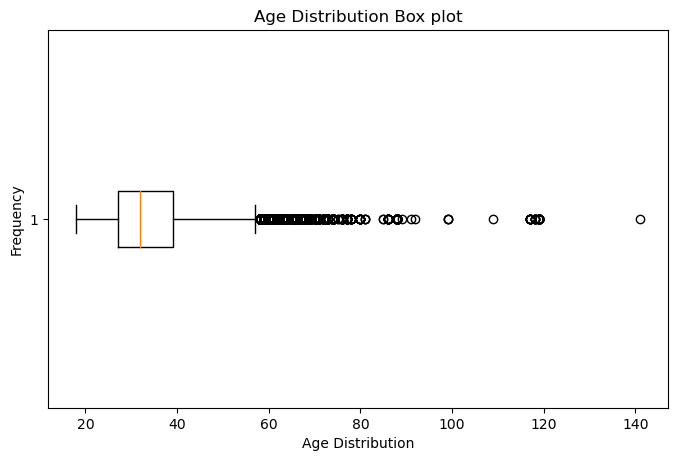

In [32]:
plt.figure(figsize=(8,5), dpi= 100)
plt.boxplot(bk['age'], vert=False)
plt.xlabel('Age Distribution')
plt.ylabel('Frequency')
plt.title('Age Distribution Box plot')

plt.show()

The above plots shows some outliers like an age of over 140yrs and majority of the users were within the 20 to 60 range.


## Distribution of Rides by Hours

> The higher ride frequencies for morning (8th and 9th hours) and evening (17th and 18th hours) can be linked to rush hours where people leave for work and come back later in the evening.

<AxesSubplot:xlabel='end_hour', ylabel='count'>

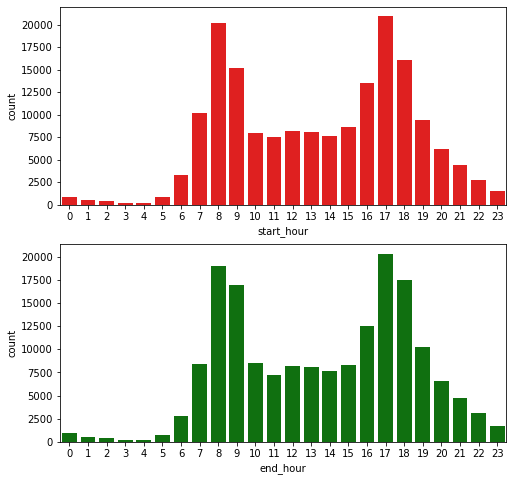

In [33]:
fig, ax = plt.subplots(2,figsize = [8,8])

default_color = sb.color_palette()[0]
sb.countplot(data = bk, x = 'start_hour', color = 'red',  ax = ax[0])
sb.countplot(data = bk, x = 'end_hour', color = 'green', ax = ax[1])

Both start and end day plots are identical, but for the start and end hour there is an obvious difference specifically in the hour 8 and 22 and the rest similar. For the week day the most active day Thursday and the least active were Sunday and Saturday

## Trip Duration across Days and Customer Types

Customer trips take a longer duration regardless of the day of the week(longest on weekends) whereas subscribers generally travel a short distance with a little increase on weekends but not up to that of the customers.


AttributeError: 'numpy.ndarray' object has no attribute 'legend'

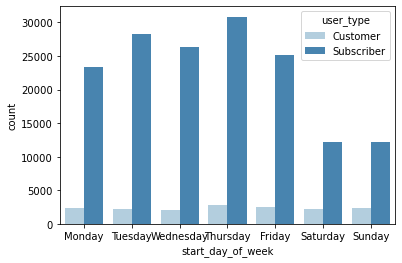

In [34]:
ordinal_var_dict = {'start_day_of_week': ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday'],
                    }

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    bk[var] = bk[var].astype(ordered_var)

sb.countplot(data = bk, x = 'start_day_of_week', hue = 'user_type', palette = 'Blues')
ax.legend(ncol = 1) # re-arrange legend to reduce overlapping
plt.xticks(rotation=12)
plt.show()

The use of this service for Subscribers is high on weekdays and decreases on weekends. In contrast to Subscribers, Customers have increased on weekends, starting from Friday and decreasing on Sundays. It is possible that the newcomers will return to their respective places that day, because Monday they have started their activities again.

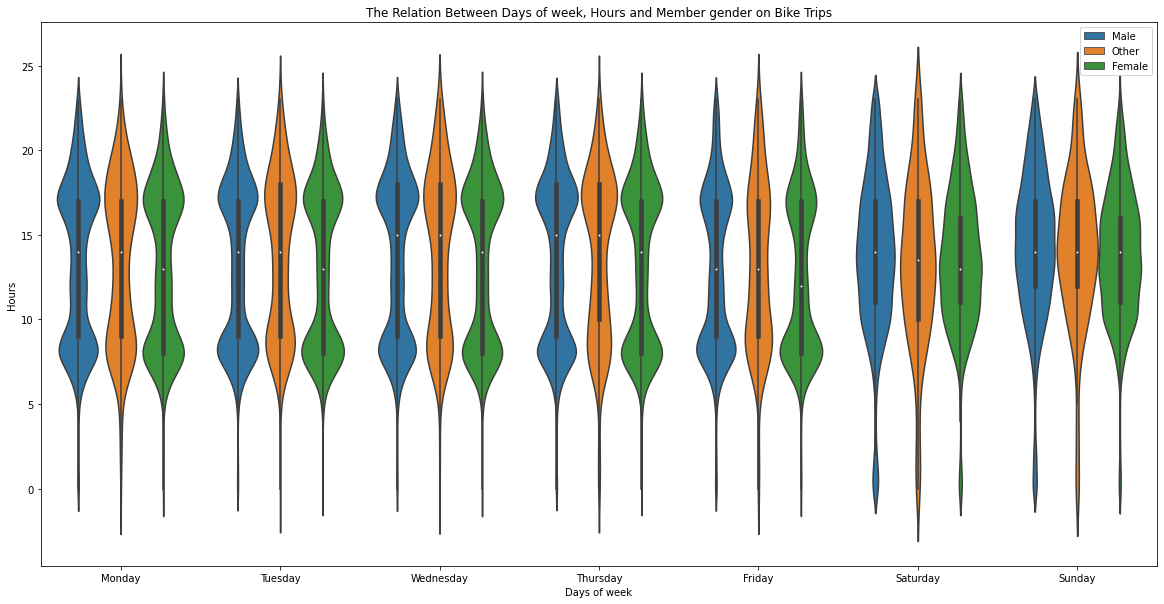

In [18]:
plt.figure(figsize=[20,10])
sb.violinplot(data=bk,x='start_day_of_week',y='start_hour',hue='member_gender')
plt.legend(loc=1)
plt.title('The Relation Between Days of week, Hours and Member gender on Bike Trips')
plt.xlabel('Days of week')
plt.ylabel('Hours');


Most trips are withing the weekend and mostly done by females

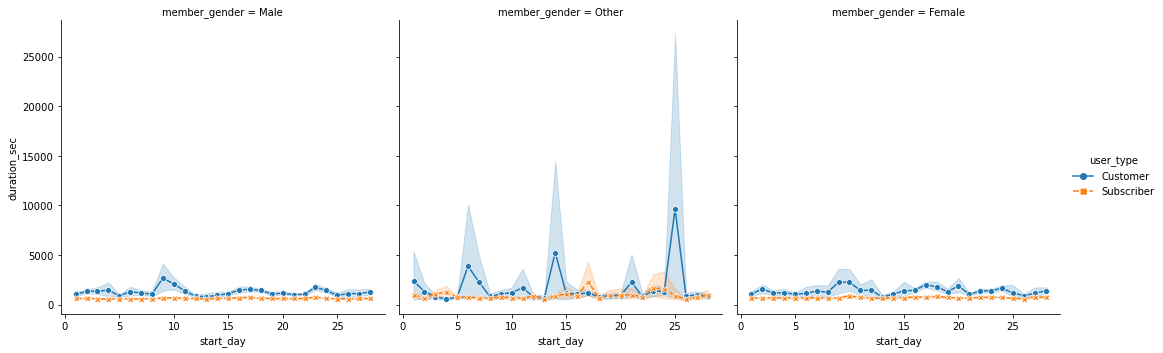

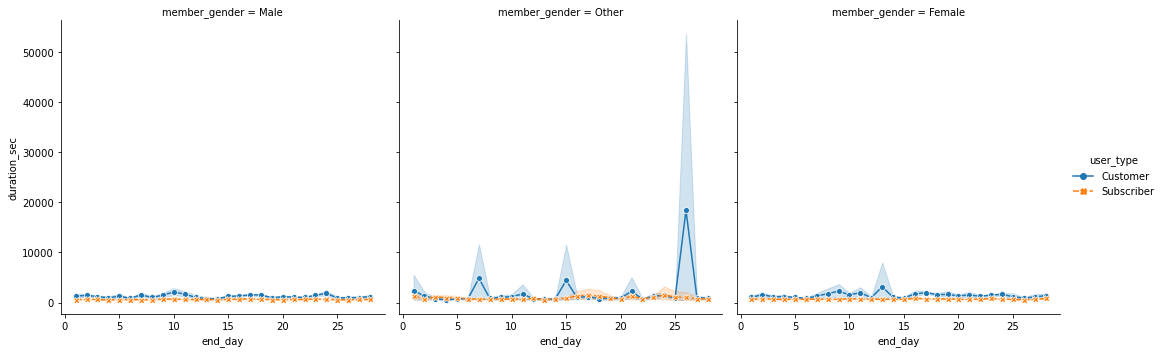

In [9]:
sb.relplot(
    data=bk, kind="line",
    x="start_day", y="duration_sec", col="member_gender",
    hue="user_type", style="user_type", markers=True,
)
sb.relplot(
    data=bk, kind="line",
    x="end_day", y="duration_sec", col="member_gender",
    hue="user_type", style="user_type", markers=True,
)

* For male customers most riding duration when the customer starts the ride in the second week of the month
* For male customers most rides duration ends with the 10th of the month
* For Female customers the rides with the most duration are in the second week of the month too
* For Female customers rides ends between the 10th and the 15th are with the most duration
* Subscribers both male and female don't give that much of details

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [10]:
!jupyter nbconvert <Part_II_slide_deck_template>.ipynb --to slides --post serve --no-input --no-prompt

zsh:1: no such file or directory: Part_II_slide_deck_template


> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel.